In [1]:
import numpy as np
import h5py
import os
import sys
import datetime
import csv
from torchvision import transforms as transforms
import matplotlib.pyplot as plt
import pickle

np.random.seed(0)

In [21]:
path = './data/'
winLength = 2
numChan = 24
feature = "topo"
f = h5py.File(path + f"child_mind_x_train_{winLength}s_{numChan}chan_{feature}.mat", 'r')
x_train = f['X_train']

print('X_train shape: ' + str(x_train.shape))
f = h5py.File(path + f"child_mind_y_train_{winLength}s_{numChan}chan_{feature}.mat", 'r')
y_train = f['Y_train']
y_train = np.reshape(y_train, -1)

print('Y_train shape: ' + str(y_train.shape))

f = h5py.File(path + f"child_mind_x_val_{winLength}s_{numChan}chan_{feature}.mat", 'r')
x_val = f['X_val']

print('X_val shape: ' + str(x_val.shape))
f = h5py.File(path + f"child_mind_y_val_{winLength}s_{numChan}chan_{feature}.mat", 'r')
y_val = f['Y_val']
y_val = np.reshape(y_val, -1)
print('Y_val shape: ' + str(y_val.shape))

f = h5py.File(path + f"child_mind_x_test_{winLength}s_{numChan}chan_{feature}.mat", 'r')
x_test = f['X_test']

print('X_test shape: ' + str(x_test.shape))
f = h5py.File(path + f"child_mind_y_test_{winLength}s_{numChan}chan_{feature}.mat", 'r')
y_test = f['Y_test']
y_test = np.reshape(y_test, -1)
print('Y_test shape: ' + str(y_test.shape))

X_train shape: (71138, 3, 24, 24)
Y_train shape: (71138,)
X_val shape: (39641, 3, 24, 24)
Y_val shape: (39641,)
X_test shape: (15925, 3, 24, 24)
Y_test shape: (15925,)


In [3]:
print(np.histogram(y_train))

(array([35707,     0,     0,     0,     0,     0,     0,     0,     0,
       35674]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


Gender: 1.0 (0 is male, 1 is female)


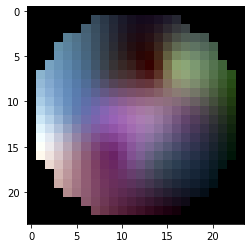

In [32]:
# visualize input
# visualize topo input
subjIdx = 87
print(f"Gender: {y_train[subjIdx]} (0 is male, 1 is female)")
plt.imshow(np.transpose(x_train[subjIdx].astype('int32'),(1,2,0)))
plt.show()

In [ ]:
# reshaped sample to 1-D vector
x_train_reshaped = np.reshape(x_train,(-1,3*24*24))
x_val_reshaped = np.reshape(x_val,(-1,3*24*24))
x_test_reshaped = np.reshape(x_test,(-1,3*24*24))

# Random forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train_reshaped, y_train)

RandomForestClassifier()

In [7]:
print(f"Training acc: {forest.score(x_train_reshaped,y_train)}")
print(f"Validation acc: {forest.score(x_val_reshaped,y_val)}")
print(f"Test acc: {forest.score(x_test_reshaped,y_test)}")

1.0

In [10]:
pickle.dump(forest, open('random_forest_topo.sav', 'wb'))

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # lasso by default
logreg.fit(x_train_reshaped, y_train)

/home/dtyoung/.conda/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
print(f"Training acc: {logreg.score(x_train_reshaped,y_train)}")
print(f"Validation acc: {logreg.score(x_val_reshaped,y_val)}")
print(f"Test acc: {logreg.score(x_test_reshaped,y_test)}")

0.7753240181056538

In [15]:
pickle.dump(logreg, open('logistic_regression_topo.sav', 'wb'))

# LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_reshaped, y_train)

LinearDiscriminantAnalysis()

In [17]:
print(f"Training acc: {lda.score(x_train_reshaped,y_train)}")
print(f"Validation acc: {lda.score(x_val_reshaped,y_val)}")
print(f"Test acc: {lda.score(x_test_reshaped,y_test)}")

0.7734825269195086

In [20]:
pickle.dump(lda, open('LDA_topo.sav', 'wb'))

# SVM